# Hold out

In [1]:
# %load imports.py
%load_ext autoreload
%autoreload 2
%reload_kedro
%config Completer.use_jedi = False  ## (To fix autocomplete)

import pandas as pd
pd.options.display.max_rows = 100
from src.models.vmm import ModelSimulator
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,10)
plt.style.use('presentation')
from src.visualization.plot import track_plots, plot, captive_plot
import kedro
import numpy as np
import os.path
import anyconfig


from myst_nb import glue
from src.symbols import *
import src.symbols as symbols
from src.system_equations import *

from IPython.display import display, Math, Latex, Markdown
from sympy.physics.vector.printing import vpprint, vlatex

from src.models.regression import MotionRegression

from src.parameters import df_parameters
p = df_parameters["symbol"]

# Read configs:
conf_path = os.path.join("../../conf/base/")
runs_globals_path = os.path.join(
    conf_path,
    "runs_globals.yml",
)

runs_globals = anyconfig.load(runs_globals_path)
model_test_ids = runs_globals["model_test_ids"]

join_globals_path = os.path.join(
    conf_path,
    "join_globals.yml",
)

joins = runs_globals["joins"]
join_runs_dict = anyconfig.load(join_globals_path)

globals_path = os.path.join(
    conf_path,
    "globals.yml",
)
global_variables = anyconfig.load(globals_path)



vmm_names = global_variables["vmms"]
only_joined = global_variables[
    "only_joined"
]  # (regress/predict with only models from joined runs)S

vmms = {}
for vmm_name in vmm_names:
    vmms[vmm_name] = catalog.load(vmm_name)


UsageError: Line magic function `%reload_kedro` not found.


In [42]:
id = 22774

ship_data = catalog.load("ship_data")
data = catalog.load(f"{ id }.data_ek_smooth")

dataframes = {}
styles = {}
for vmm_name in vmm_names:
    
    data_resimulate = catalog.load(f"{ vmm_name }.motion_regression.no_circle.{ id }.data_resimulate")
    
    #index = np.argmax(data_resimulate.isnull().any(axis=1))
    if data_resimulate.notnull().all(axis=1).all():
        dataframes[vmm_name] = data_resimulate.copy()
    
    styles[vmm_name] = {'alpha':0.75}


dataframes['model test'] = data.iloc[0:-8000]
styles['model test'] = {'style':'k-', 'alpha':1, 'lw':3}

2022-03-25 08:39:58,206 - kedro.io.data_catalog - INFO - Loading data from `ship_data` (YAMLDataSet)...
2022-03-25 08:39:58,209 - kedro.io.data_catalog - INFO - Loading data from `22774.data_ek_smooth` (CSVDataSet)...
2022-03-25 08:39:58,252 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz.motion_regression.no_circle.22774.data_resimulate` (CSVDataSet)...
2022-03-25 08:39:58,270 - kedro.io.data_catalog - INFO - Loading data from `vmm_abkowitz_simple.motion_regression.no_circle.22774.data_resimulate` (CSVDataSet)...
2022-03-25 08:39:58,289 - kedro.io.data_catalog - INFO - Loading data from `vmm_martin.motion_regression.no_circle.22774.data_resimulate` (CSVDataSet)...
2022-03-25 08:39:58,310 - kedro.io.data_catalog - INFO - Loading data from `vmm_linear.motion_regression.no_circle.22774.data_resimulate` (CSVDataSet)...
2022-03-25 08:39:58,347 - kedro.io.data_catalog - INFO - Loading data from `vmm_martins_simple.motion_regression.no_circle.22774.data_resimulate` (CSVDataS

(5.0, 25.0)

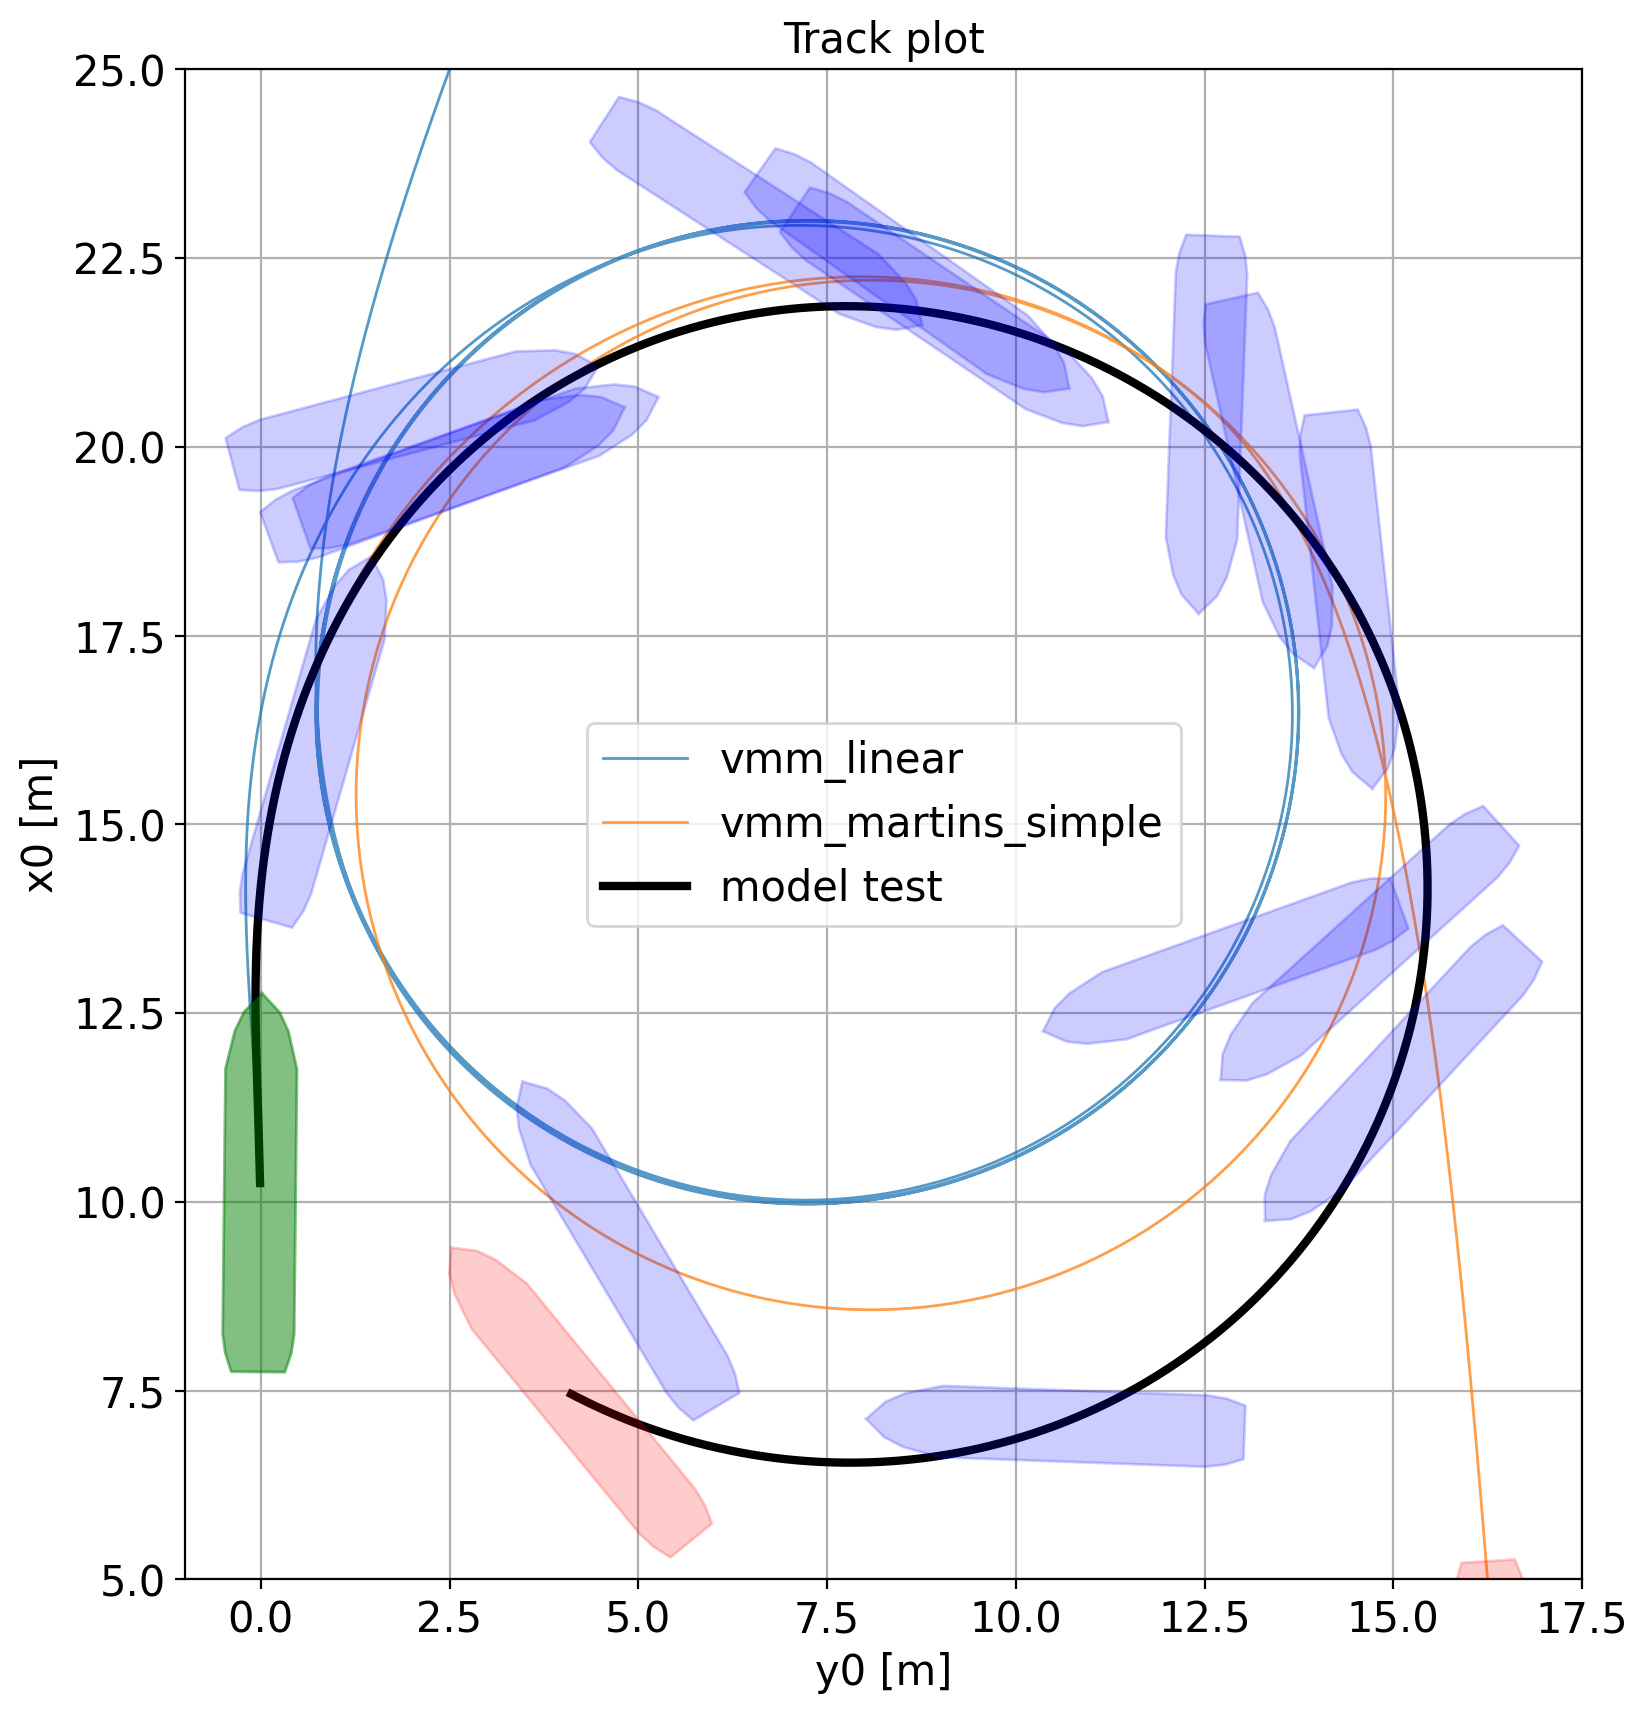

In [45]:
fig = track_plots(dataframes, lpp=ship_data['L'], beam=ship_data['B'], plot_boats=True, styles=styles, N=7);
fig.axes.set_xlim(-1,17.5)
fig.axes.set_ylim(5,25)
